## Visualization and analysis of legal texts

While browsing the Internet, you have probably seen a picture of a cloud filled with words of varying sizes that reflect the frequency of each word within a given text. This is referred to as a Tag Cloud or a Word Cloud. In this tutorial (see the notebook [here]()), we will learn how to make Word Clouds in Python. This tool is useful for a visual exploration of text data.

We will use legal texts for the purpose of this tutorial, namely the Tunisian Constitution and the Tunisian Hydrocarbons Code.   
- [Generating Word Clouds](#Generating-Word-Clouds)
- [Counting words](Counting-words)
- [Comparing different documents](Comparing-different-documents)

***   
As usual, we start by importing the different libraries used.   
The `NumPy` library is used for handling large, multi-dimensional arrays and matrices.   
For visualization, `matplotlib` is a comprehensive plotting library. It enables other libraries, such as `seaborn` and `wordcloud`, to run on its base.   
The `pillow` library adds support for opening, manipulating, and saving many different image file formats.

In [39]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

***   
### Generating Word Clouds   
Then, we read the Hydrocarbons Code stored in a `.txt` file. I chose this legal document, because I have worked on it and analysed it for a thesis [report](http://www.meherbejaoui.com/blog/Governance-of-extractive-industry-in-Tunisia) I wrote. It is a complex legal text that pertains to a sensitive and important topic, that is natural resources.   

We have to make some necessary text processing. First, we convert the entire text to lower case. This is important since Python strings are case sensitive. Afterwards, we use the magic of regular expressions to deal with apostrophes and other characters to be removed.   
Whenever in doubt regarding regular expressions syntax, you can use [this](https://regex101.com/) website or the official Python [documentation](https://docs.python.org/3/library/re.html) to have the desired outcome.

In [40]:
hydrocarbons_code = open("hydrocarbons_code.txt", encoding='latin_1').read().replace("\n"," ")
hydrocarbons_code = hydrocarbons_code.lower()
hydrocarbons_code = re.sub(".'|[^\w ]", " ", hydrocarbons_code)

Since the text is in French, we have to make our own list (technically it's a Python **set** with curly brackets here) of the words to remove from the given text. These words would not show in the Word Cloud.    

If you do not speak French, most of these words are the equivalent to English articles, pronouns and conjunctions. They would not help us much in understanding the text through visuals. 

In [41]:
stop = {'de','du','des','et','est','la','le','les','en','ou','par','au','aux','dans','une','un','pour','sur','ce','ces',
        'ne','qui','que','son','ses','sa','il','ci','a'}

In order to create an image form for the Word Cloud, we need to use a PNG file as a mask. Here, I use the map of Tunisia, just for fun.   

The **mask** argument in the `WordCloud` function takes an N dimensional array (ndarray). We use `Image` module to open the PNG file, and we transform it to the numpy array form.   
According to `WordCloud` documentation, all white entries will be considerd masked out, while other entries will be free to draw on. In the NumPy array, all white parts of the mask have a value of 255, whereas values of 1 are black.

In [42]:
map_mask = np.array(Image.open("map.png"))

Now, we have a proper mask and we can make a cloud with the desired shape.   
`WordCloud` takes several parameters, and you can create a personalised result by changing the optional arguments. Some of these are fairly self-explanatory. For the rest, you can always consult the relevant [documentation](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html). Or, you can check out the docstring of the function and see the required and optional arguments, by typing and running `?WordCloud`.

In [43]:
hydrocarbons_cloud = WordCloud(max_words=1000, mask=map_mask, stopwords=stop , min_word_length = 3, min_font_size = 8,
                               margin=5, random_state=1, background_color="white", include_numbers=True).generate(hydrocarbons_code)

Finally, we can output the result and have an insightful and beautiful visualizations.   
Naturally, the most frequent words are *hydrocarbons*, *code*, *article* and *holder*, as expected in a legal document about hydrocarbons! 

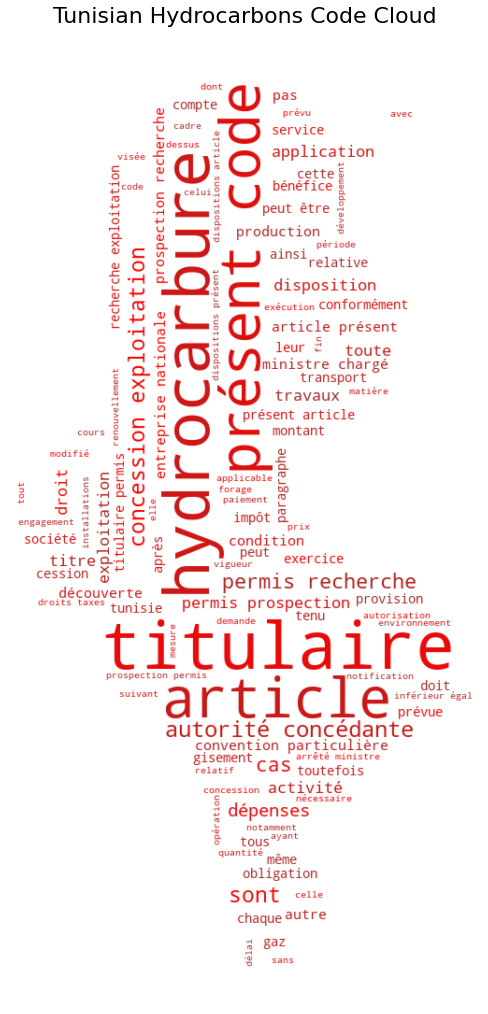

In [44]:
%matplotlib inline
plt.figure(figsize=(18,18))
ax = plt.gca()
ax.set_title("Tunisian Hydrocarbons Code Cloud",fontsize=22)
plt.imshow(hydrocarbons_cloud.recolor(colormap=sns.color_palette(palette='blend:red,brown',as_cmap=True), random_state=3), 
           interpolation="bilinear")
plt.axis("off")
plt.show()
#hydrocarbons_cloud.to_file("Hydrocarbons code cloud.png") #comment out to save the figure in a PNG format

***   
Now, let's take a look at the Tunisian Constitution. We will use an English translation from [constitute project](https://www.constituteproject.org/constitution/Tunisia_2014?lang=en). 

As before, we start by constructing a mask. For this example, it will be the Tunisian flag. For the rest, the only difference is that we use the default built-in *STOPWORDS* list. 

In [45]:
flag_mask = np.array(Image.open("Flag_of_Tunisia.png"))

tunisian_constitution = open("constitution.txt").read().replace("\n"," ").lower()
tunisian_constitution = re.sub("[^\w ]", " ", tunisian_constitution)

constitution_cloud = WordCloud(max_words=1000, mask=flag_mask, stopwords=STOPWORDS , min_word_length = 3, min_font_size = 8,
                               margin=5, random_state=1, background_color="white", include_numbers=True).generate(tunisian_constitution)

Our exquisite result looks good, and presents us with useful visual anchor.

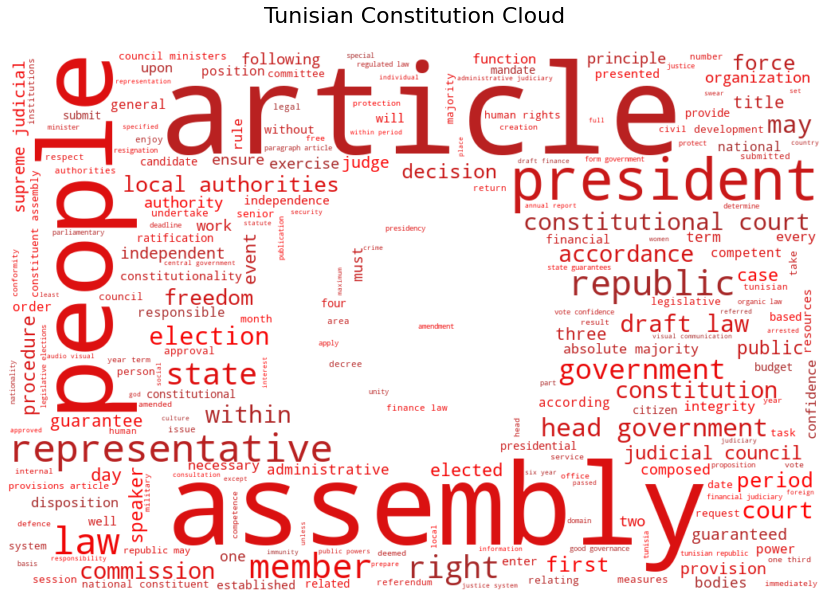

In [46]:
%matplotlib inline
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.set_title("Tunisian Constitution Cloud",fontsize=22, y=1.04)
plt.imshow(constitution_cloud.recolor(colormap=sns.color_palette(palette='blend:red,brown',as_cmap=True)), 
           interpolation="bilinear")
plt.axis("off")
plt.show()
#constitution_cloud.to_file("Tunisian Constitution Cloud.png") #comment out to save the figure in a PNG format

***   
### Counting words   
However, text analysis goes beyond visualisations. We can count words using the [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) collection.
If we are only interested in the most common words, we can use `.most_common()` with or without an argument specifiying the number of words.   

In the code below, we use *list comprehension* to store words appearing more than 30 times in the constitution and having at least 4 letters.

In [47]:
from collections import Counter
tunisian_words = [x for x in Counter(tunisian_constitution.split()).most_common(50) if x[1]>30 and len(x[0])>3 ]
tunisian_words

[('article', 173),
 ('shall', 173),
 ('assembly', 149),
 ('president', 110),
 ('people', 108),
 ('government', 100),
 ('representatives', 97),
 ('with', 97),
 ('republic', 96),
 ('state', 67),
 ('members', 62),
 ('court', 62),
 ('their', 50),
 ('draft', 48),
 ('head', 47),
 ('constitutional', 45),
 ('that', 43),
 ('laws', 42),
 ('within', 40),
 ('from', 39),
 ('right', 38),
 ('council', 37),
 ('judicial', 37),
 ('authorities', 34),
 ('local', 33),
 ('national', 32),
 ('after', 32),
 ('rights', 31),
 ('constitution', 31)]

***    
### Comparing different documents   
We can compare the occurences of words in two documents as well. We will use the French constitution for comparison, despite the differences between the governance systems of the two countries as implemented in their respective constitutions.   

We read and process the `.txt` file as we did before. Then, we store the words of each document in a list (*tunisian_words* and *french_words*). 


In [48]:
french_constitution = open("french constitution.txt").read().replace("\n"," ").lower()
french_constitution = re.sub("[^\w ]", " ", french_constitution)

tunisian_words = tunisian_constitution.split(" ")
french_words = french_constitution.split(" ")

Afterwards, we construct a DataFrame by passing in the *Counter* collections as data entries, and setting the column labels.   
In this example, we chose to remove missing values or *drop* them by using `.dropna()` with a **0** argument. That means, we drop rows which contain missing values. That would give us a DataFrame of only the words that exist in both documents!   

The result below shows the number of occurrences of each word, the total, and a percentage value indicating the prevalence of that word in the Tunisian constitution with reference to its total use in both documents. 

In [49]:
df = pd.DataFrame({
    'Tunisian_constitution': Counter(tunisian_words),
    'French_constitution': Counter(french_words)
}).dropna(0)

df['Total'] = df.Tunisian_constitution + df.French_constitution
df['Tunisian_percentage'] = (df.Tunisian_constitution / df.Total) * 100

df.head(10)

,Tunisian_constitution,French_constitution,Total,Tunisian_percentage
preamble,2.0,2.0,4.0,50.000000
in,224.0,270.0,494.0,45.344130
the,1705.0,1380.0,3085.0,55.267423
of,1089.0,798.0,1887.0,57.710652
,1284.0,1378.0,2662.0,48.234410
representatives,97.0,2.0,99.0,97.979798
people,108.0,9.0,117.0,92.307692
members,62.0,65.0,127.0,48.818898
national,32.0,54.0,86.0,37.209302
assembly,149.0,52.0,201.0,74.129353


All of these common words between the two documents were used differently in each. We can check how many times they appeared by returning the sum of the values over the desired axis.

In [50]:
df.sum(axis = 0)

Tunisian_constitution    11950.000000
French_constitution      11769.000000
Total                    23719.000000
Tunisian_percentage      40472.171694
dtype: float64

***    
Now, let's look at words used ten or more times in the Tunisian constitution. We sort them by descending value.   
The `for` loop is used to go through `df.index` and remove the words having three characters or less.

In [51]:
for ind in df.index:
    if len(ind)<4:
        df.drop(ind, inplace = True)
        
df[df.Tunisian_constitution >= 10].sort_values(by='Tunisian_constitution', ascending=False)

,Tunisian_constitution,French_constitution,Total,Tunisian_percentage
shall,173.0,358.0,531.0,32.580038
article,173.0,167.0,340.0,50.882353
assembly,149.0,52.0,201.0,74.129353
president,110.0,78.0,188.0,58.510638
people,108.0,9.0,117.0,92.307692
...,...,...,...,...
relating,10.0,7.0,17.0,58.823529
principles,10.0,4.0,14.0,71.428571
councils,10.0,3.0,13.0,76.923077
approval,10.0,5.0,15.0,66.666667


We can use the `df.sum()` again to compute the frequency of those words.

In [52]:
df.sum(axis = 0)

Tunisian_constitution     5109.000000
French_constitution       5125.000000
Total                    10234.000000
Tunisian_percentage      34301.487972
dtype: float64

***    
In this notebook (using *python 3.7 pandas 1.2.1* and *matplotlib 3.3.2*), we have learned how to draw a Word Cloud that would be helpful for visualization of any text. Besides, we used `Counter` to count words in documents. The tool worked well with pandas DataFrames, allowing us to make simple comparisons.   
   
This might have been naive text analysis, but it is an important first step towards a more comprehensive and elaborate text analysis.